In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from M3RefTracking import M3RefTracking
from DetectorConfigLoader import DetectorConfigLoader
from Detector import Detector
from DreamDetector import DreamDetector
from DreamData import DreamData

from det_classes_test import plot_ray_hits_2d, align_dream, get_residuals
from detector_characterization import filter_ray_xy

In [2]:
base_dir = 'F:/Saclay/cosmic_data/'
det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
run_name = 'urw_stats_10-31-24'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'long_run'

det_single = 'urw_inter'

# file_nums = list(range(0, 10))
file_nums = 'all'

chunk_size = 100  # Number of files to process at once

realign_dream = True  # If False, read alignment from file, if True, realign Dream detector

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
m3_dir = f'{run_dir}{sub_run_name}/m3_tracking_root/'
alignment_dir = f'{run_dir}alignments/'

z_align_range = [5, 5]  # mm range to search for optimal z position

try:
    os.mkdir(alignment_dir)
except FileExistsError:
    pass
try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [3]:
print(f'Getting ray data...')
ray_data = M3RefTracking(m3_dir, single_track=True, file_nums=file_nums)

Getting ray data...


100%|██████████| 88/88 [00:04<00:00, 20.80it/s]


In [4]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [5]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')
det.load_dream_data(data_dir, ped_dir, 10, file_nums, chunk_size, save_waveforms=True)
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [1, 2, 3, 4]
HV: {'drift': 600, 'resist_1': 410}
Pedestal data shape: (1033, 256, 32)
Pedestal fits: (256,)
Reading in data...


100%|██████████| 88/88 [00:25<00:00,  3.48it/s]


Read in data shape: (191601, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:03<00:00,  4.73it/s]


Fitting time: 3.9284255504608154 s
Processed chunk 1/1
Getting hits...
Hits shape: (191601, 256)


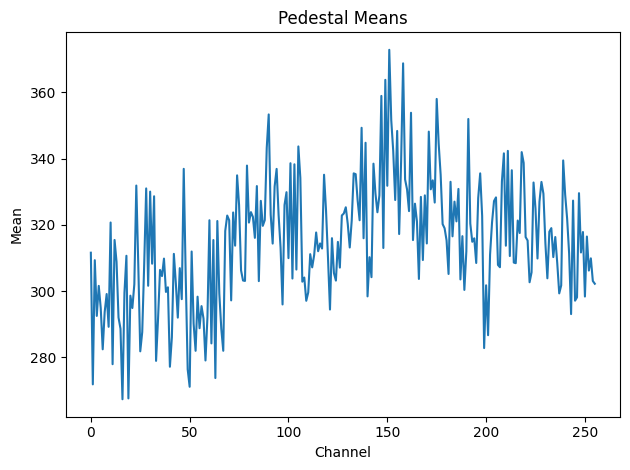

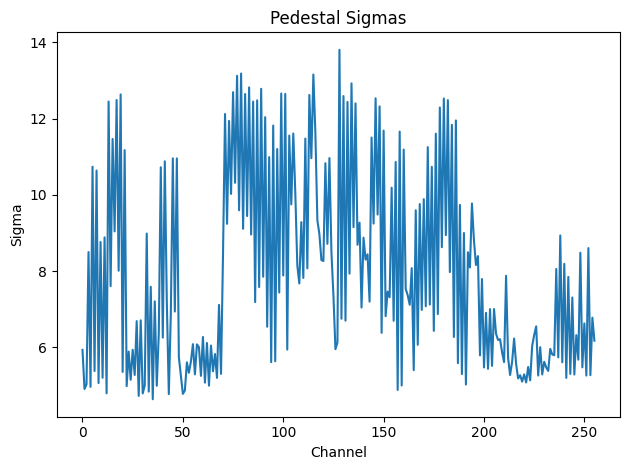

In [6]:
det.dream_data.plot_pedestals()

C:\Users\Dylan\PycharmProjects\saclay_micromegas\DreamData.py:435: RuntimeWarning: invalid value encountered in divide
  max_amp_div_sum = event_max_amps / event_amp_sums


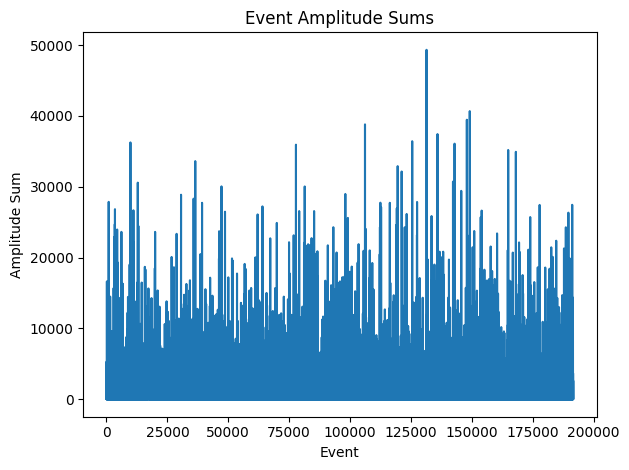

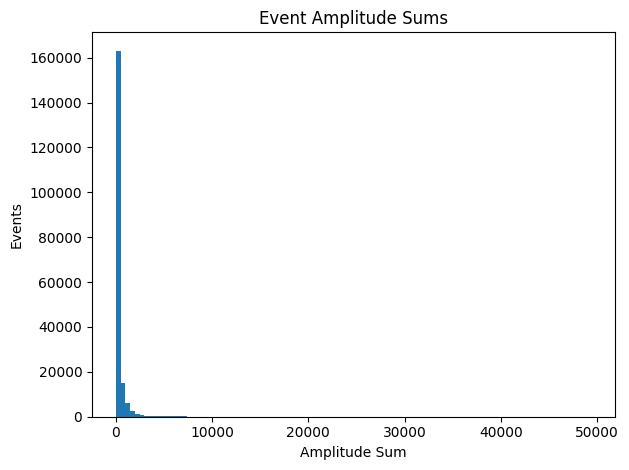

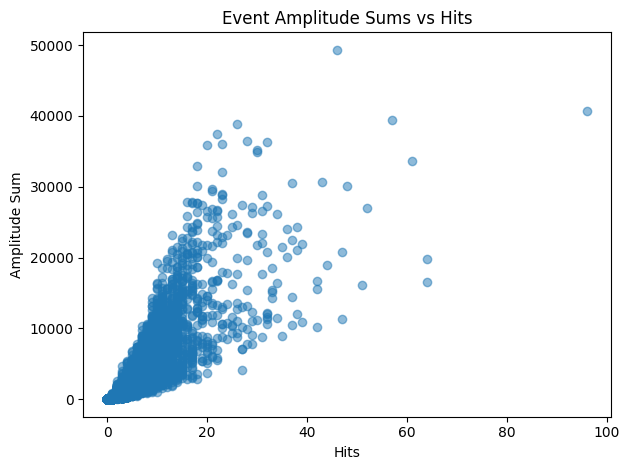

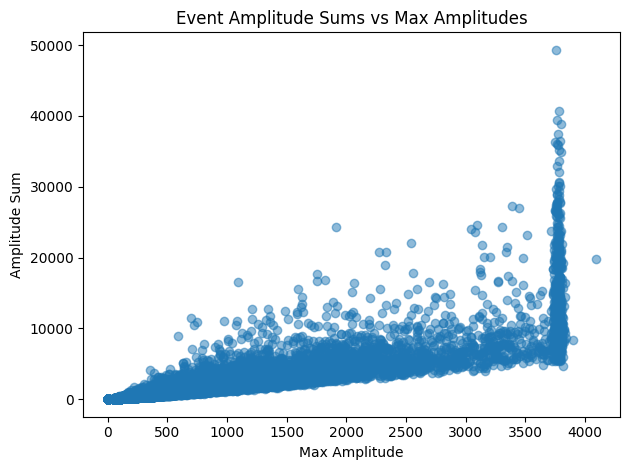

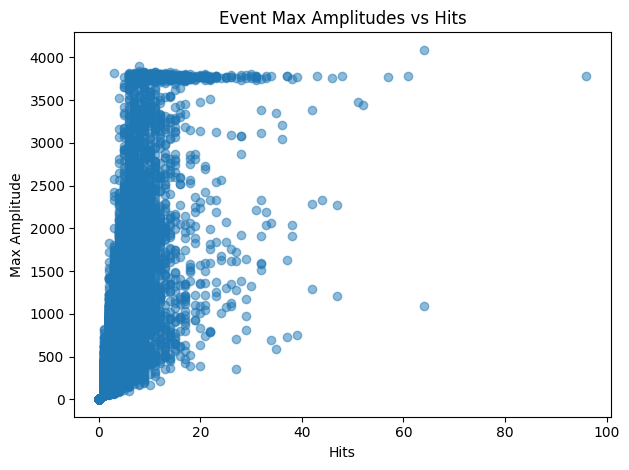

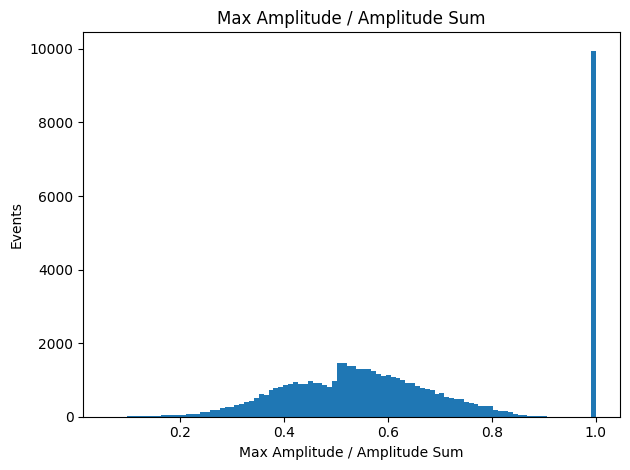

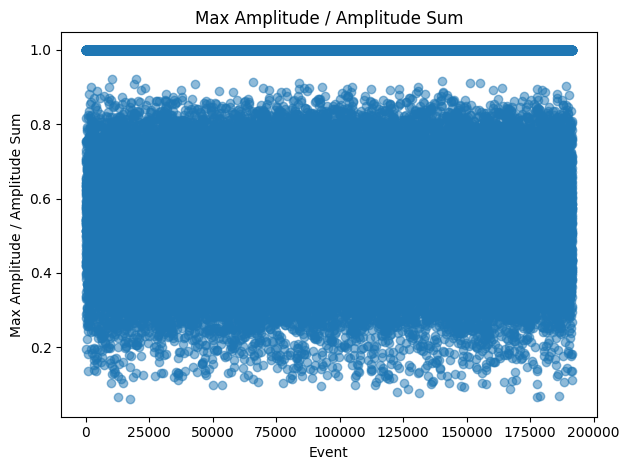

In [7]:
det.dream_data.plot_noise_metric()

Connector 1 Dead Strips: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Connector 2 Dead Strips: [114 116 117 118 119 120 121 122 123 124 125 126 127]
Connector 3 Dead Strips: [128 129 130 131 132 133 134 135 136 137]
Connector 4 Dead Strips: [215 225 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255]


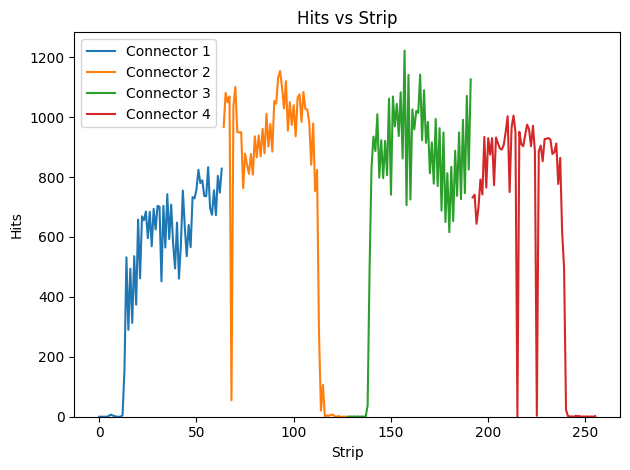

In [8]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

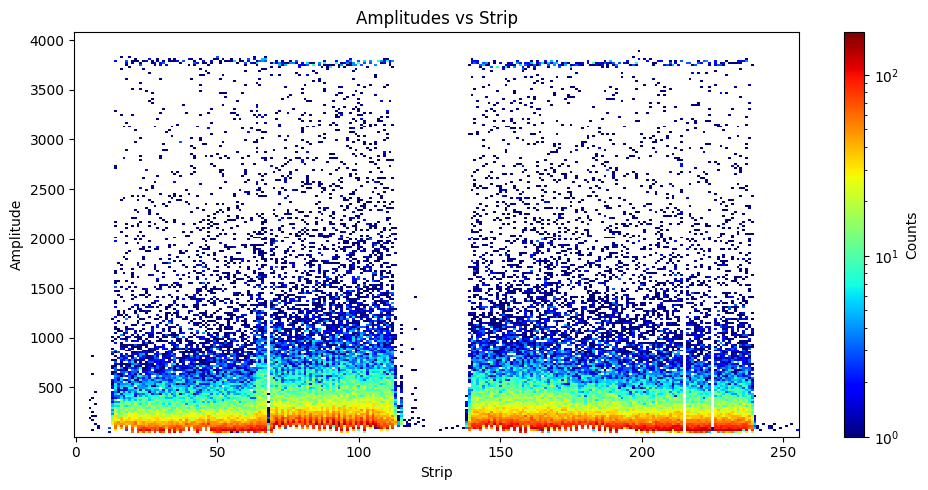

In [9]:
det.dream_data.plot_amplitudes_vs_strip()

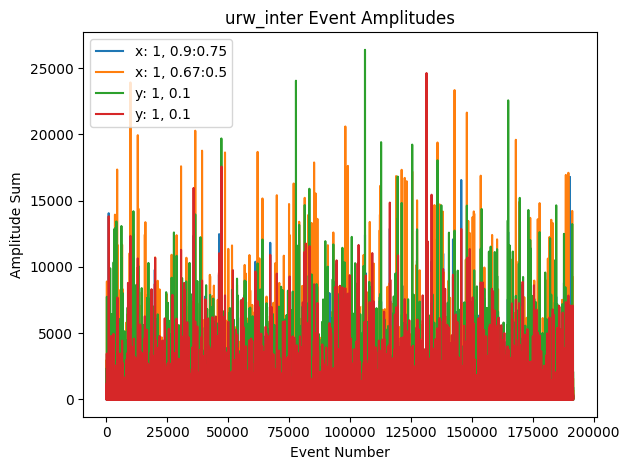

In [10]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

if realign_dream:
    det.add_rotation(90, 'z')

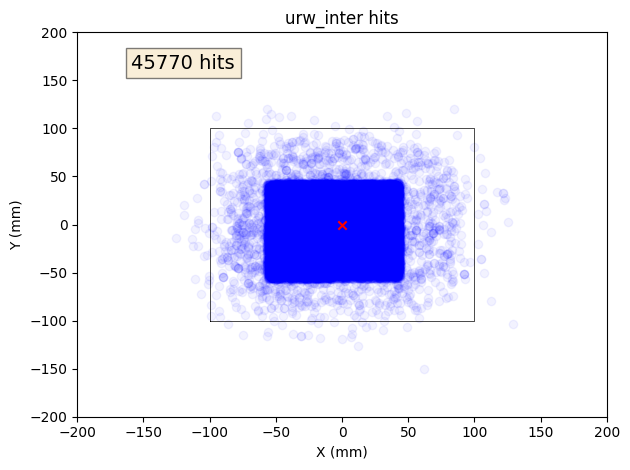

In [11]:
plot_ray_hits_2d(det, ray_data)

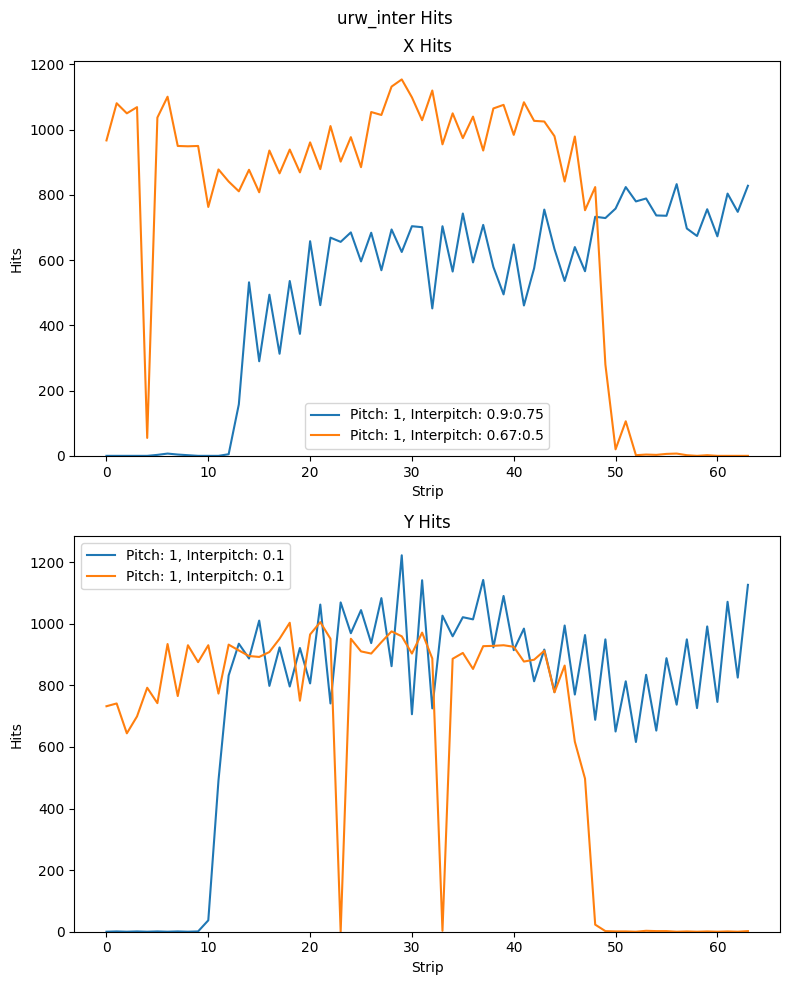

In [12]:
det.plot_hits_1d()

In [13]:
print(len(det.dream_data.hits))

191601


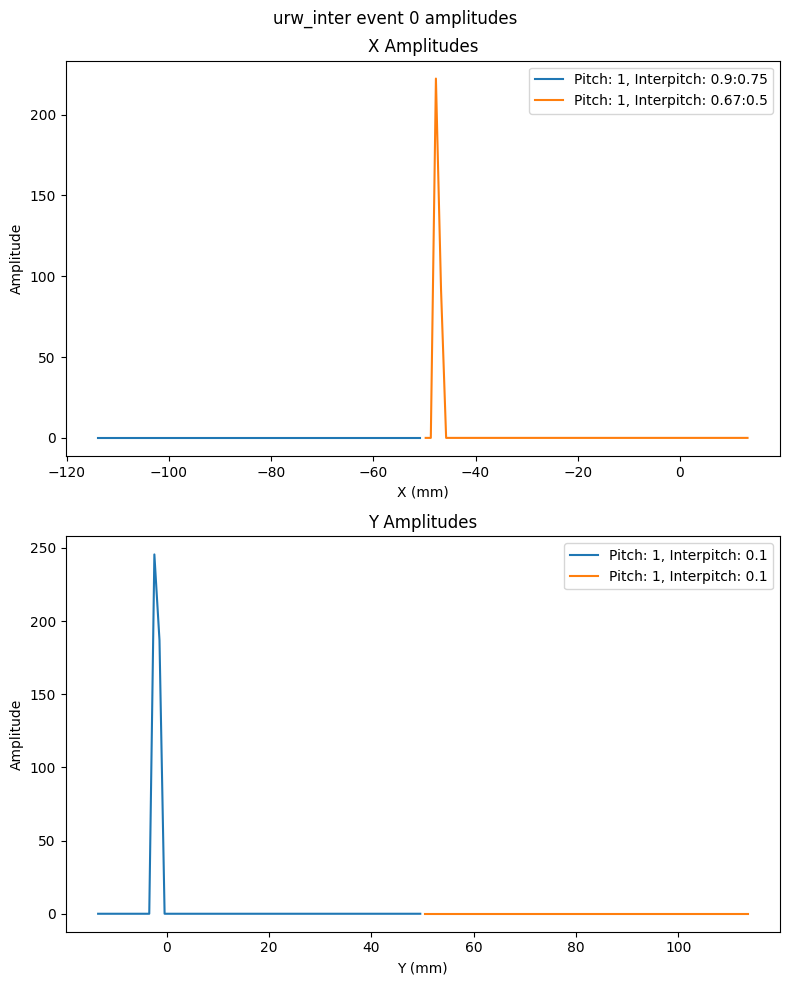

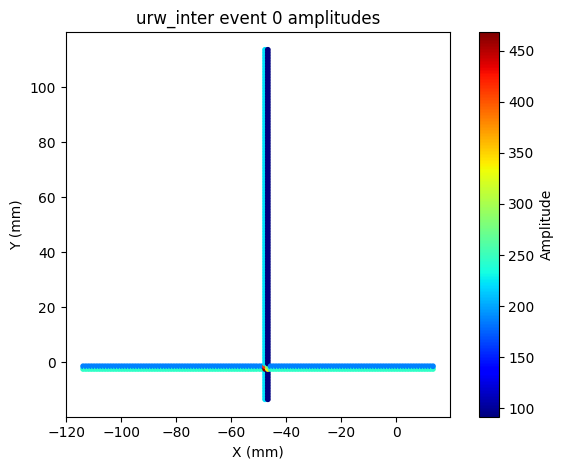

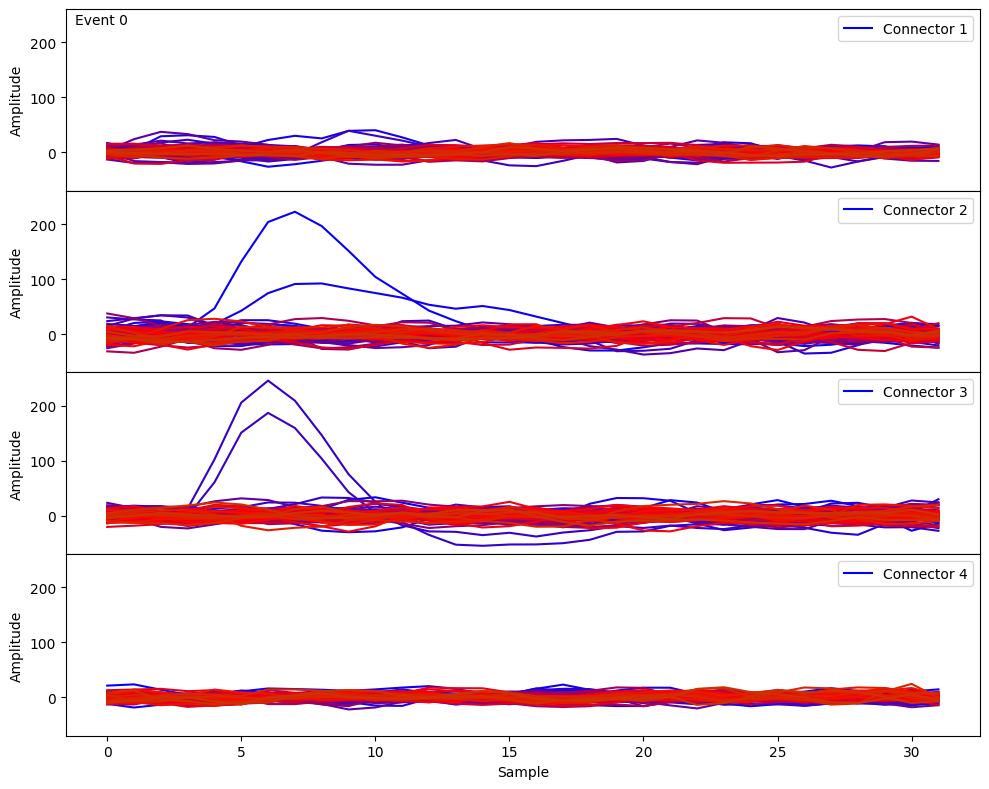

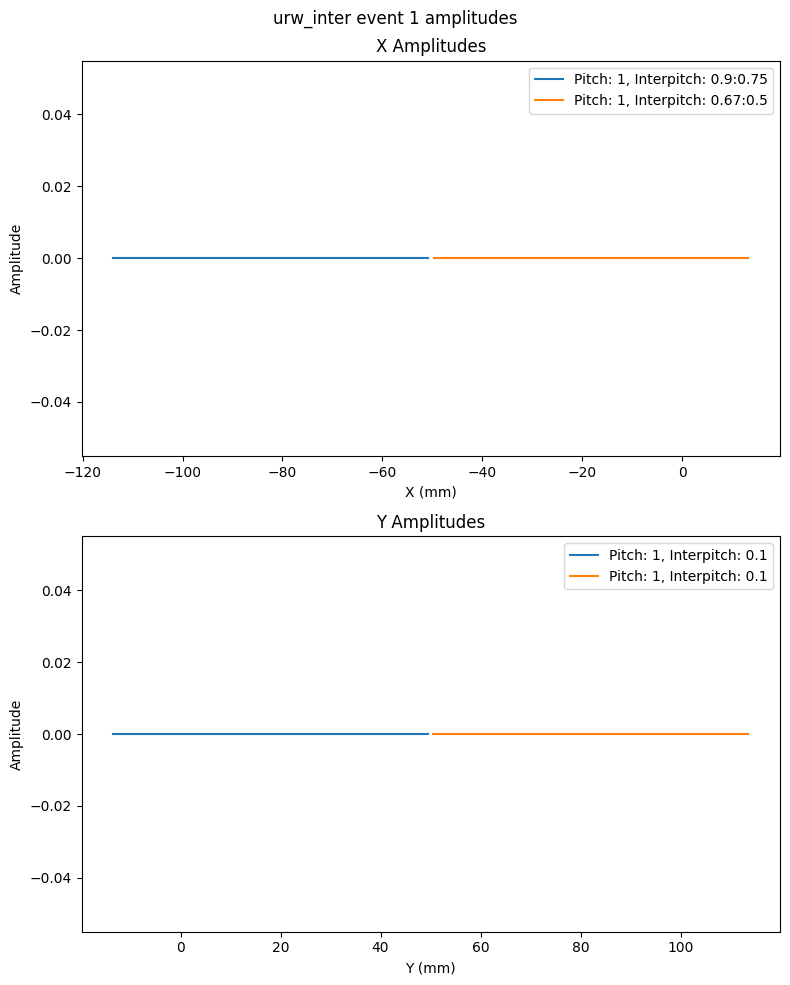

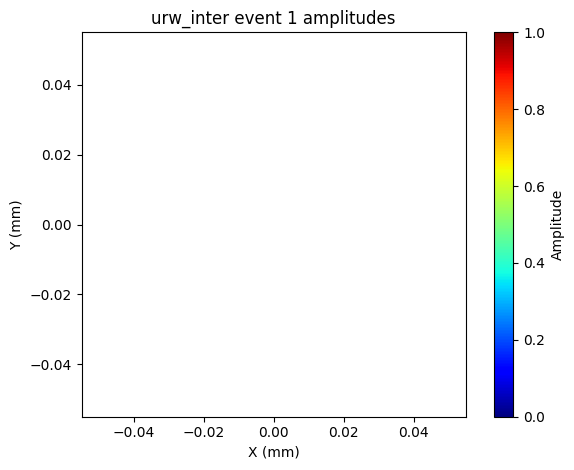

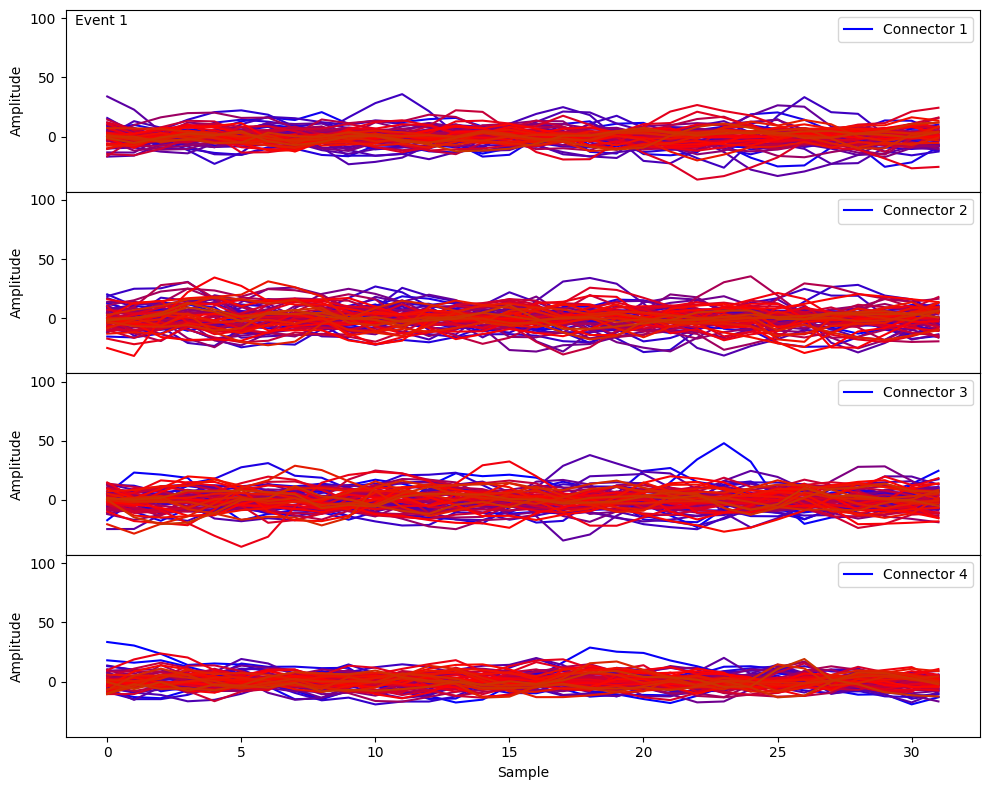

In [14]:
for event_num in range(min(len(det.dream_data.hits), 2)):
    det.plot_event_1d(event_num)
    det.plot_event_2d(event_num)
    det.dream_data.plot_waveforms(event_num)

z: 697.0
z: 697.3448275862069
z: 697.6896551724138
z: 698.0344827586207
z: 698.3793103448276
z: 698.7241379310345
z: 699.0689655172414
z: 699.4137931034483
z: 699.7586206896551
z: 700.1034482758621
z: 700.448275862069
z: 700.7931034482758
z: 701.1379310344828
z: 701.4827586206897
z: 701.8275862068965
z: 702.1724137931035
z: 702.5172413793103
z: 702.8620689655172
z: 703.2068965517242
z: 703.551724137931
z: 703.8965517241379
z: 704.2413793103449
z: 704.5862068965517
z: 704.9310344827586
z: 705.2758620689655
z: 705.6206896551724
z: 705.9655172413793
z: 706.3103448275862
z: 706.6551724137931
z: 707.0
z_rot: -1.0
z_rot: -0.9310344827586207
z_rot: -0.8620689655172413
z_rot: -0.7931034482758621
z_rot: -0.7241379310344828
z_rot: -0.6551724137931034
z_rot: -0.5862068965517242
z_rot: -0.5172413793103449
z_rot: -0.4482758620689655
z_rot: -0.3793103448275862
z_rot: -0.31034482758620685
z_rot: -0.24137931034482762
z_rot: -0.1724137931034483
z_rot: -0.10344827586206895
z_rot: -0.034482758620689724
z

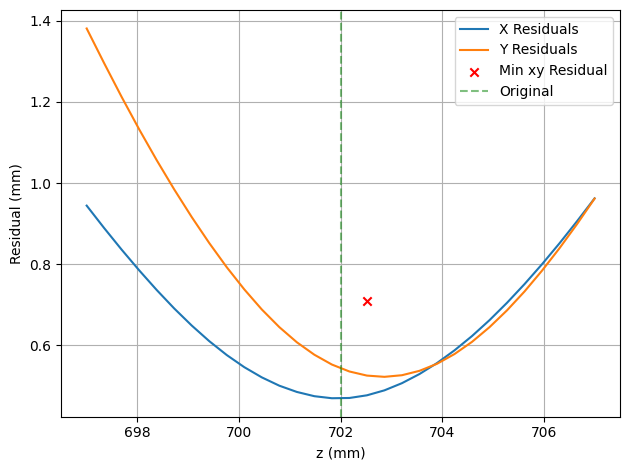

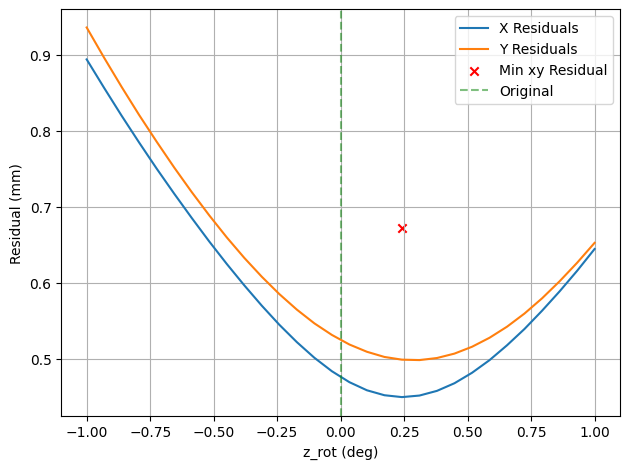

In [15]:
z_orig = det.center[2]
x_bnds = det.center[0] - det.size[0] / 2, det.center[0] + det.size[0] / 2
y_bnds = det.center[1] - det.size[1] / 2, det.center[1] + det.size[1] / 2
ray_traversing_triggers = ray_data.get_traversing_triggers(z_orig, x_bnds, y_bnds, expansion_factor=0.1)

alignment_file = f'{alignment_dir}{det.name}_alignment.txt'
if realign_dream:
    align_dream(det, ray_data, z_align_range)
    det.write_det_alignment_to_file(alignment_file)
else:
    det.read_det_alignment_from_file(alignment_file)

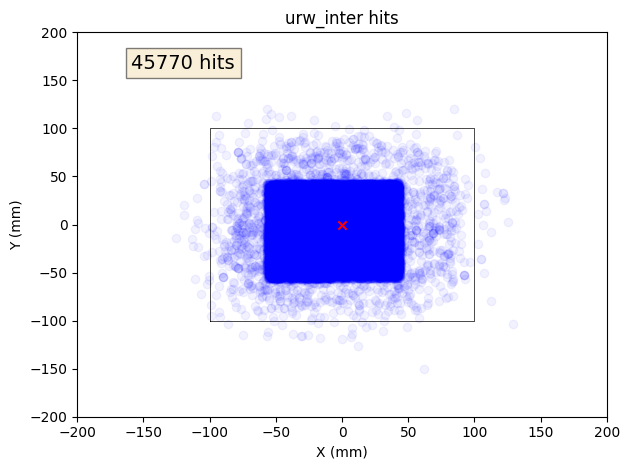

In [16]:
plot_ray_hits_2d(det, ray_data)

In [ ]:
get_residuals(det, ray_data, plot=True, in_det=True, tolerance=0.2)

X Residuals: Mean=-3μm, Std=404μm
Y Residuals: Mean=-13μm, Std=465μm
